<a href="https://colab.research.google.com/github/sathiyaseelanjr/Renewable-Energy-Forecasting-/blob/main/LSTM_MODEL_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import datetime as dt
from statsmodels.tsa.stattools import adfuller
import plotly.offline as pyoff
import plotly.graph_objs as go
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# matplotlib style & parameter changes
import matplotlib
# Use the legacy style name for Matplotlib versions before 3.6
matplotlib.style.use('seaborn-v0_8-darkgrid')
matplotlib.rcParams['figure.figsize'] = (16, 7)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing complete wind and solar energy  data for 2015- 2021 Germany

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/filtered_time_series (1).csv", parse_dates=[0], index_col=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420 entries, 2014-12-31 23:00:00+00:00 to 2015-01-18 10:00:00+00:00
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   cet_cest_timestamp                    420 non-null    object 
 1   DE_load_actual_entsoe_transparency    419 non-null    float64
 2   DE_load_forecast_entsoe_transparency  419 non-null    float64
 3   DE_solar_capacity                     420 non-null    float64
 4   DE_solar_generation_actual            412 non-null    float64
 5   DE_solar_profile                      412 non-null    float64
 6   DE_wind_capacity                      420 non-null    float64
 7   DE_wind_generation_actual             419 non-null    float64
 8   DE_wind_profile                       419 non-null    float64
 9   DE_wind_offshore_capacity             420 non-null    float64
 10  DE_wind_offshore_generation_actual   

In [ ]:
#display rows which have null values in "wind generation actual"
df[df['DE_wind_generation_actual'].isna()]

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,NaN,27246.0,NaN,NaN


In [ ]:
df[df['DE_solar_generation_actual'].isna()]  #display rows which have null values in "solar generation actual"

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,NaN,27246.0,NaN,NaN
2015-01-01 00:00:00+00:00,2015-01-01T01:00:00+0100,41151.0,39723.0,37248.0,NaN,NaN,27913.0,8852.0,0.3171,667.0,517.0,0.7744,27246.0,8336.0,0.3059
2015-01-01 01:00:00+00:00,2015-01-01T02:00:00+0100,40135.0,38813.0,37248.0,NaN,NaN,27913.0,9054.0,0.3244,667.0,514.0,0.7710,27246.0,8540.0,0.3134
2015-01-01 02:00:00+00:00,2015-01-01T03:00:00+0100,39106.0,38490.0,37248.0,NaN,NaN,27913.0,9070.0,0.3249,667.0,518.0,0.7761,27246.0,8552.0,0.3139
2015-01-01 03:00:00+00:00,2015-01-01T04:00:00+0100,38765.0,38644.0,37248.0,NaN,NaN,27913.0,9163.0,0.3283,667.0,520.0,0.7793,27246.0,8643.0,0.3172
2015-01-01 04:00:00+00:00,2015-01-01T05:00:00+0100,38941.0,38773.0,37248.0,NaN,NaN,27913.0,9231.0,0.3307,667.0,520.0,0.7790,27246.0,8712.0,0.3197
2015-01-01 05:00:00+00:00,2015-01-01T06:00:00+0100,39045.0,37247.0,37248.0,NaN,NaN,27913.0,9689.0,0.3471,667.0,521.0,0.7815,27246.0,9167.0,0.3365
2015-01-01 06:00:00+00:00,2015-01-01T07:00:00+0100,40206.0,40371.0,37248.0,NaN,NaN,27913.0,10331.0,0.3701,667.0,520.0,0.7801,27246.0,9811.0,0.3601


In [ ]:
df.isna().sum()   #75 null values for wind_gen_actual #104 null values for solar_gen_actual

,0
cet_cest_timestamp,0
DE_load_actual_entsoe_transparency,1
DE_load_forecast_entsoe_transparency,1
DE_solar_capacity,0
DE_solar_generation_actual,8
DE_solar_profile,8
DE_wind_capacity,0
DE_wind_generation_actual,1
DE_wind_profile,1
DE_wind_offshore_capacity,0


####Filling null values from the values of the day before

In [ ]:
nulls = df.isna().any(axis=1)
df.loc[nulls, ['DE_solar_generation_actual','cet_cest_timestamp']] = df.shift(24).loc[nulls, ['DE_solar_generation_actual','cet_cest_timestamp']]

#shift function to shift the index 24 hours

####Rechecking the null values (whatever left)

In [ ]:
df[df['DE_solar_generation_actual'].isna()]

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,None,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,NaN,27246.0,NaN,NaN
2015-01-01 00:00:00+00:00,None,41151.0,39723.0,37248.0,NaN,NaN,27913.0,8852.0,0.3171,667.0,517.0,0.7744,27246.0,8336.0,0.3059
2015-01-01 01:00:00+00:00,None,40135.0,38813.0,37248.0,NaN,NaN,27913.0,9054.0,0.3244,667.0,514.0,0.7710,27246.0,8540.0,0.3134
2015-01-01 02:00:00+00:00,None,39106.0,38490.0,37248.0,NaN,NaN,27913.0,9070.0,0.3249,667.0,518.0,0.7761,27246.0,8552.0,0.3139
2015-01-01 03:00:00+00:00,None,38765.0,38644.0,37248.0,NaN,NaN,27913.0,9163.0,0.3283,667.0,520.0,0.7793,27246.0,8643.0,0.3172
2015-01-01 04:00:00+00:00,None,38941.0,38773.0,37248.0,NaN,NaN,27913.0,9231.0,0.3307,667.0,520.0,0.7790,27246.0,8712.0,0.3197
2015-01-01 05:00:00+00:00,None,39045.0,37247.0,37248.0,NaN,NaN,27913.0,9689.0,0.3471,667.0,521.0,0.7815,27246.0,9167.0,0.3365
2015-01-01 06:00:00+00:00,None,40206.0,40371.0,37248.0,NaN,NaN,27913.0,10331.0,0.3701,667.0,520.0,0.7801,27246.0,9811.0,0.3601


Observation --> The only remaining null values left are the ones that were from the first day because we filled in the rest of the null values from the day before.

In [ ]:
#fill in the rest to zero because that is what they would be at those hours of night till 6 am
df['DE_solar_generation_actual'].fillna(0, inplace = True)
df['cet_cest_timestamp'].fillna(0, inplace = True)

####Repeating the same for wind energy

In [ ]:
nulls =df.isna().any(axis=1)
df.loc[nulls, ['DE_wind_generation_actual','cet_cest_timestamp']] = df.shift(24).loc[nulls, ['DE_wind_generation_actual','cet_cest_timestamp']]



####Replacing the null values (whatever left) by mean



In [ ]:
df[df['DE_wind_generation_actual'].isna()]

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,None,NaN,NaN,37248.0,0.0,NaN,27913.0,NaN,NaN,667.0,NaN,NaN,27246.0,NaN,NaN
2015-01-01 00:00:00+00:00,None,41151.0,39723.0,37248.0,0.0,NaN,27913.0,NaN,0.3171,667.0,517.0,0.7744,27246.0,8336.0,0.3059
2015-01-01 01:00:00+00:00,None,40135.0,38813.0,37248.0,0.0,NaN,27913.0,NaN,0.3244,667.0,514.0,0.7710,27246.0,8540.0,0.3134
2015-01-01 02:00:00+00:00,None,39106.0,38490.0,37248.0,0.0,NaN,27913.0,NaN,0.3249,667.0,518.0,0.7761,27246.0,8552.0,0.3139
2015-01-01 03:00:00+00:00,None,38765.0,38644.0,37248.0,0.0,NaN,27913.0,NaN,0.3283,667.0,520.0,0.7793,27246.0,8643.0,0.3172
2015-01-01 04:00:00+00:00,None,38941.0,38773.0,37248.0,0.0,NaN,27913.0,NaN,0.3307,667.0,520.0,0.7790,27246.0,8712.0,0.3197
2015-01-01 05:00:00+00:00,None,39045.0,37247.0,37248.0,0.0,NaN,27913.0,NaN,0.3471,667.0,521.0,0.7815,27246.0,9167.0,0.3365
2015-01-01 06:00:00+00:00,None,40206.0,40371.0,37248.0,0.0,NaN,27913.0,NaN,0.3701,667.0,520.0,0.7801,27246.0,9811.0,0.3601


In [ ]:
df['DE_wind_generation_actual'].mean()

17456.242718446603

In [ ]:
df['DE_wind_generation_actual'].fillna(11556, inplace=True)

In [ ]:
df.isna().sum()

,0
cet_cest_timestamp,8
DE_load_actual_entsoe_transparency,1
DE_load_forecast_entsoe_transparency,1
DE_solar_capacity,0
DE_solar_generation_actual,0
DE_solar_profile,8
DE_wind_capacity,0
DE_wind_generation_actual,0
DE_wind_profile,1
DE_wind_offshore_capacity,0


#HEAT MAP TO CHECK CORRELATIONS BETWEEN FEATURES

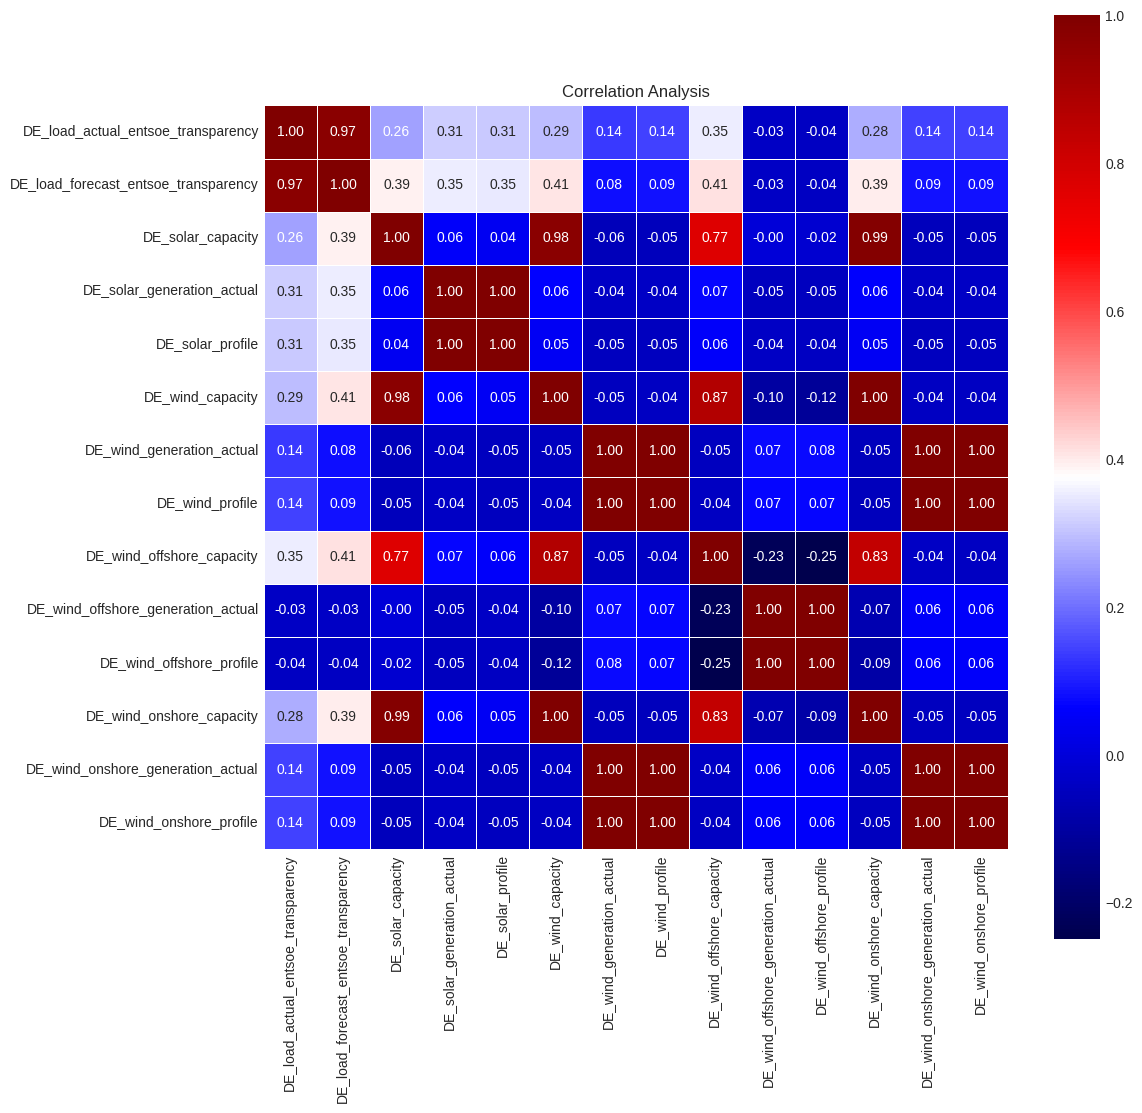

In [ ]:
# Calculate the correlation matrix, excluding non-numeric columns.
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(data=df.select_dtypes(include=np.number).corr(), #select only numerical features
            annot=True,
            annot_kws={"size": 10},
            square=True,
            cmap='seismic',
            fmt='.2f',
            linewidths=0.5,
            linecolor='w',
            ax=ax)
plt.title('Correlation Analysis')
plt.show()

solar_generation_actual depends most on solar_profile

wind_generation-actual depends most on wind_profile, wind_onshore_profile, wind_onshore_generation and  then on wind_offshore_profile and wind_offshore_generation

#dataset with timestamps as features (used later for time series forecasting models)

In [ ]:
modified=df[['cet_cest_timestamp', 'DE_solar_generation_actual','DE_wind_generation_actual']]
modified

,cet_cest_timestamp,DE_solar_generation_actual,DE_wind_generation_actual
utc_timestamp,,,
2014-12-31 23:00:00+00:00,None,0.0,11556.0
2015-01-01 00:00:00+00:00,None,0.0,11556.0
2015-01-01 01:00:00+00:00,None,0.0,11556.0
2015-01-01 02:00:00+00:00,None,0.0,11556.0
2015-01-01 03:00:00+00:00,None,0.0,11556.0
...,...,...,...
2015-01-18 06:00:00+00:00,2015-01-18T07:00:00+0100,0.0,7844.0
2015-01-18 07:00:00+00:00,2015-01-18T08:00:00+0100,249.0,7291.0
2015-01-18 08:00:00+00:00,2015-01-18T09:00:00+0100,1890.0,6644.0


In [ ]:
#modified dataset
# energy_all = pd.read_csv("time_series_60min_singleindex_filtered (3).csv",
#                         parse_dates=[0], index_col=0)

The only remaining null values left are the ones that were from the first day because we filled in the rest of the null values from the day before. We see that it that it also turned the dummy column, cet_cest_timestamp, into nulls at the same location. This is why I used it as dummy column.

In [ ]:
# Drop the column becasue we do not need another time column
modified.drop(columns='cet_cest_timestamp',inplace=True)

# EDA

##Histograms for solar_generation_actual and wind_generation_actual

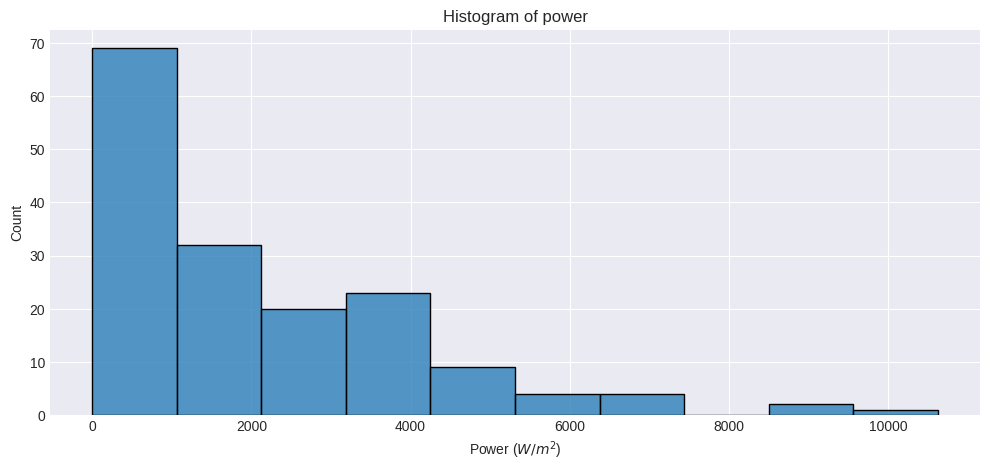

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['DE_solar_generation_actual'] != 0].DE_solar_generation_actual)  # remove all 0 in histogram
plt.title('Histogram of power')
plt.xlabel('Power ($W/m^2$)')
plt.show()

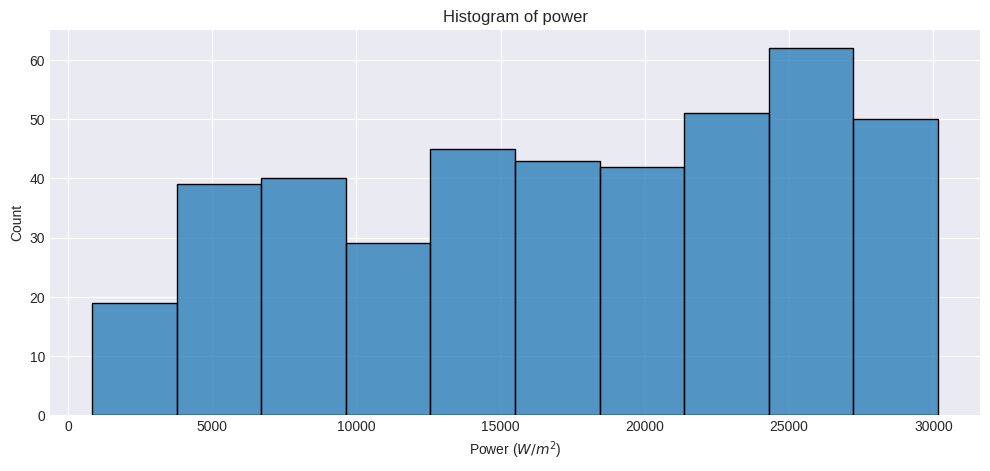

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(df[df['DE_wind_generation_actual'] != 0].DE_wind_generation_actual)  # remove all 0 in histogram
plt.title('Histogram of power')
plt.xlabel('Power ($W/m^2$)')
plt.show()

In [ ]:
# We will create a new data frame so that we can make the appropriate boxplots.
DE_energy = modified.reset_index()
DE_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   utc_timestamp               420 non-null    datetime64[ns, UTC]
 1   DE_solar_generation_actual  420 non-null    float64            
 2   DE_wind_generation_actual   420 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 10.0 KB


In [ ]:
# create utc_timestamp as a column and another hour column
DE_energy['utc_timestamp'] = pd.to_datetime(DE_energy['utc_timestamp']).apply(lambda x: dt.datetime.strftime(x,'%Y-%m-%d %H:%M:%S'))

DE_energy['utc_timestamp']=pd.to_datetime(DE_energy['utc_timestamp'])
DE_energy['hour'] = DE_energy['utc_timestamp'].dt.hour

## boxplot of energy output vs the hour at which recorded (useful for time series forecast)

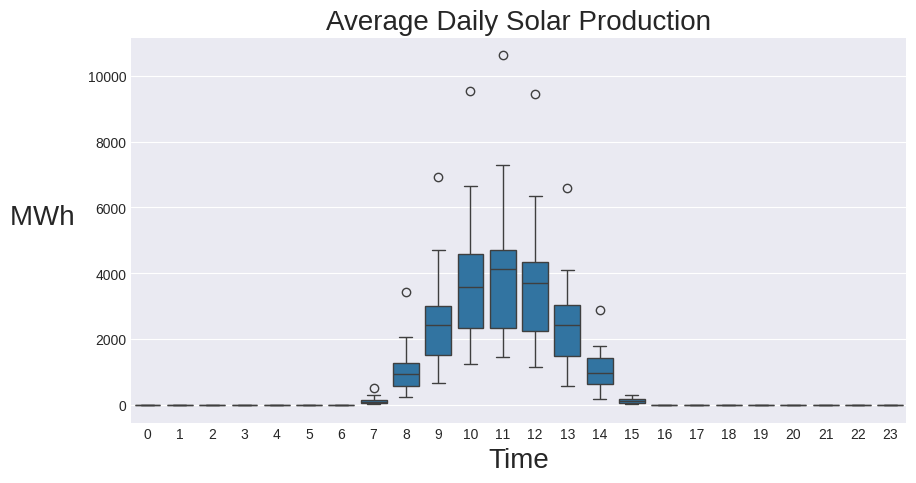

In [ ]:
# boxplot of the average solar generation production
plt.figure(figsize=(10,5))
# Specify x and y using named arguments
sns.boxplot(x=DE_energy['hour'], y=DE_energy['DE_solar_generation_actual'])

plt.title('Average Daily Solar Production',fontsize=20)

plt.xlabel('Time', fontsize=20)

plt.ylabel("MWh ",rotation=0,ha='right', fontsize=20)
plt.show()

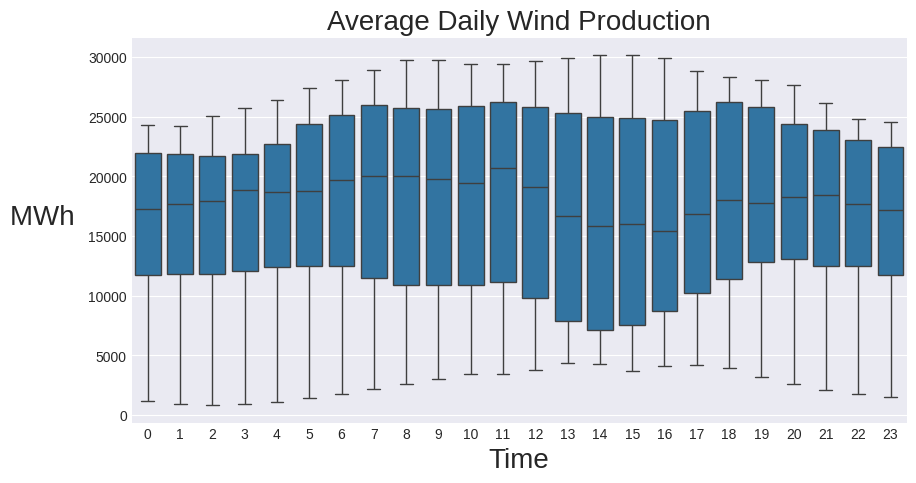

In [ ]:
# Lets repeat the process for wind.

plt.figure(figsize=(10,5))
# Specify x and y using named arguments
sns.boxplot(x=DE_energy['hour'], y=DE_energy['DE_wind_generation_actual'])


plt.title('Average Daily Wind Production',fontsize=20)

plt.xlabel('Time', fontsize=20)

plt.ylabel("MWh ",rotation=0 ,ha='right', fontsize=20)
plt.show()

Wind appears to not differ as much during the day as solar.The time of day does affect wind speed with surface temperatures increasing, however it is not shown in this plot.

We can use mean over all the days to get a better time series analysis with less noise.

In [ ]:
# use the resample function to average the generation over all the days
modified = modified.resample('D').mean()
modified

,DE_solar_generation_actual,DE_wind_generation_actual
utc_timestamp,,
2014-12-31 00:00:00+00:00,0.000000,11556.000000
2015-01-01 00:00:00+00:00,712.416667,14194.458333
2015-01-02 00:00:00+00:00,323.208333,25148.083333
2015-01-03 00:00:00+00:00,301.541667,19289.791667
2015-01-04 00:00:00+00:00,832.583333,16042.625000
2015-01-05 00:00:00+00:00,1105.083333,9022.500000
2015-01-06 00:00:00+00:00,1370.333333,4884.458333
2015-01-07 00:00:00+00:00,713.083333,9466.833333
2015-01-08 00:00:00+00:00,358.291667,18346.583333


In [ ]:
modified.shape

(19, 2)

#time series plot for energy averged over all days

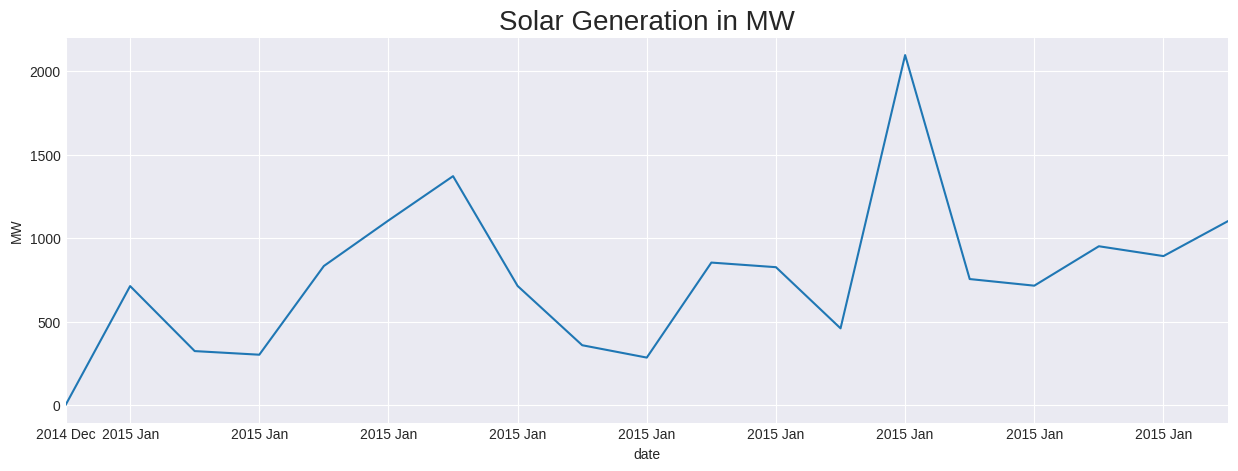

In [ ]:
# visualize the time time series of solar
plt.figure(figsize=(15,5))
plt.plot(modified['DE_solar_generation_actual'])
plt.title('Solar Generation in MW', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

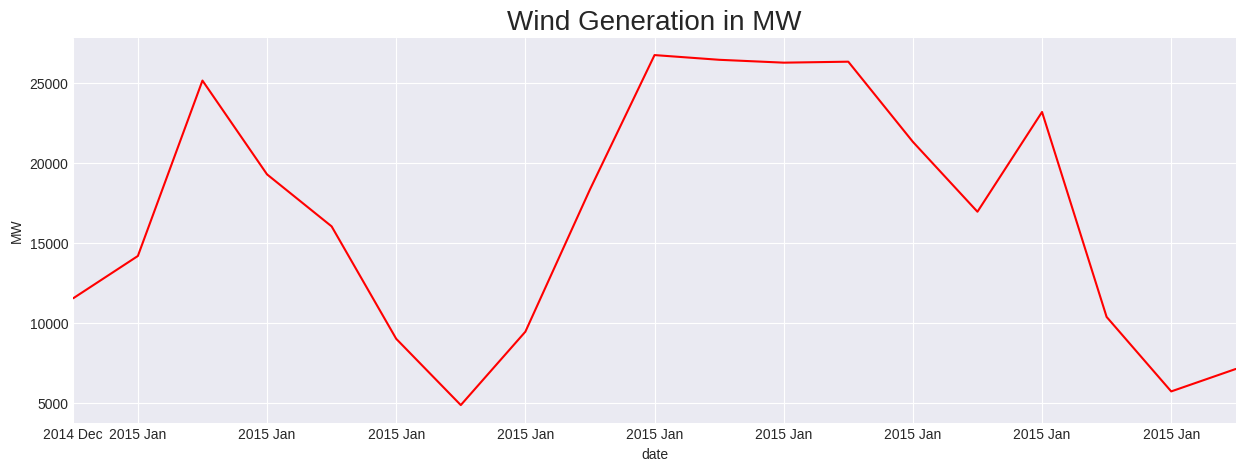

In [ ]:
# Do the same thing for the wind data
plt.figure(figsize=(15,5))
plt.plot(modified['DE_wind_generation_actual'], c='red')
plt.title('Wind Generation in MW', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

In [ ]:
# Lets check out some basic statistics for the data
modified.describe()

,DE_solar_generation_actual,DE_wind_generation_actual
count,19.000000,19.000000
mean,770.898923,16761.010766
std,466.884659,7672.351938
min,0.000000,4884.458333
25%,408.833333,9927.645833
50%,754.416667,16957.583333
75%,921.312500,24167.187500
max,2095.125000,26738.708333


The mean is much higher for wind and that is because wind produces much more electricity than solar in Germany. They both have very high standard deviations.

#LSTM MODEL

In [ ]:
#LSTM MODEL
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
import datetime as dt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

In [ ]:
# Hardcode all variables
batch_size_exp = 1
epoch_exp = 20
neurons_exp = 10
predict_values_exp = 200
lag_exp=24


In [ ]:
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [ ]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [ ]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [ ]:
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [ ]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [ ]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])  # Reshape to 3D for LSTM
    model = Sequential()
    # Use input_shape instead of batch_input_shape for the first layer
    model.add(LSTM(neurons, input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X, y, epochs=nb_epoch, batch_size=batch_size, verbose=0) # Add verbose=0 to suppress output
    return model
    print(model.summary)

In [ ]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [ ]:
df=df.dropna()


In [ ]:
df_solar=df[['DE_solar_generation_actual']]

In [ ]:
# for i in range(0,10):
#   df_solar = df_solar[:-1]
# df_solar.tail()

In [ ]:
# transform data to be stationary
raw_values = df_solar.values
diff_values = difference(raw_values, 1)

In [ ]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

In [ ]:
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [ ]:
print("Train data shape:", train.shape)  # Check the shape of the train data
print("Test data shape:", test.shape)

Train data shape: (211, 25)
Test data shape: (200, 25)


In [ ]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [ ]:
# fit the model
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)

In [ ]:
# walk-forward validation on the test data
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Hour=1, Predicted=1.649805, Expected=0.000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Hour=2, Predicted=-3.395497, Expected=0.000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Hour=3, Predicted=-0.539346, Expected=0.000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Hour=4, Predicted=64.819794, Expected=0.000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Hour=5, Predicted=185.695354, Expected=54.000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Hour=6, Predicted=394.581775, Expected=549.000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Hour=7, Predicted=997.265494, Expected=2017.000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Hour=8, Predicted=2383.821337, Expected=4231.000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Hour=9, Predicted=4354.093257, Expected=5278.000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Hour=10, Predicted=5099.915512, Expected=4540.000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Hour=11, Predicted=4127.376668, Expected=2758.000000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/st

In [ ]:
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10)                  │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,235 (16.55 KB)

 Trainable params: 1,411 (5.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,824 (11.04 KB)

Prediction Plot

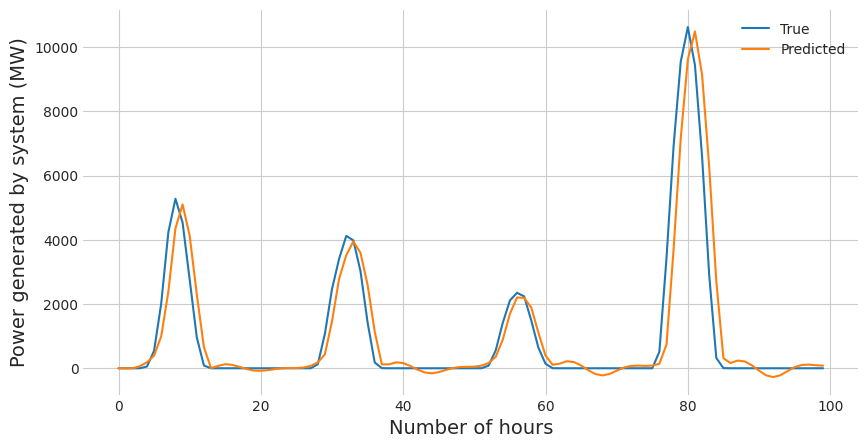

In [ ]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
pyplot.figure(figsize=(10,5))
pyplot.plot(expectations_plot[0:100], label="True")
pyplot.plot(predictions_plot[0:100], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours",fontsize=14 )
pyplot.ylabel("Power generated by system (MW)",fontsize=14)
pyplot.show()

In [ ]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.sum(np.mean(np.abs((expectations - predictions) / expectations)))))
print("Mean squared Error: ", (np.sum(np.mean(np.abs((expectations - predictions)**2 / expectations)))))
rmse = sqrt(np.mean((expectations - predictions) ** 2))
print("Root Mean Squared Error (RMSE): ", rmse)
residual=abs(expectations-predictions)
ssr=np.sum(residual**2)
mean=np.mean(expectations)
sst=np.sum((expectations-mean)**2)
print("R squared score",(1-(ssr/sst)))



Mean Absolute Percent Error:  5.608158409228145
Mean squared Error:  2013.7105313607376
Root Mean Squared Error (RMSE):  1147.5886591140718
R squared score 0.7465728648250608


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

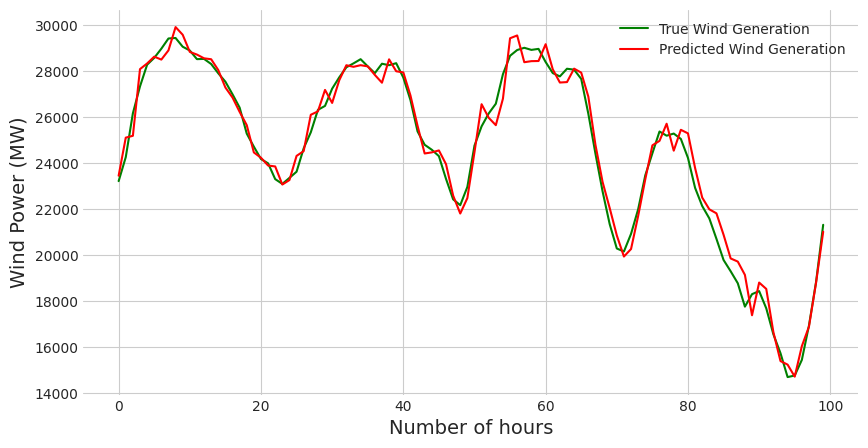

In [ ]:
# Extract wind power data
df_wind = df[['DE_wind_generation_actual']]

# Convert to stationary series (differencing)
raw_values_wind = df_wind.values
diff_values_wind = difference(raw_values_wind, 1)

# Convert to supervised learning format
supervised_wind = timeseries_to_supervised(diff_values_wind, lag_exp)
supervised_values_wind = supervised_wind.values

# Split into train and test sets (same prediction window)
train_wind, test_wind = supervised_values_wind[:-predict_values_exp], supervised_values_wind[-predict_values_exp:]

# Scale using the same scaler
_, _, test_scaled_wind = scale(train_wind, test_wind)  # We only need test_scaled_wind

# Generate wind power predictions using the existing LSTM model
predictions_plot_wind, expectations_plot_wind = [], []
for i in range(len(test_scaled_wind)):
    X, y = test_scaled_wind[i, :-1], test_scaled_wind[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)  # Use the same trained model
    yhat = invert_scale(scaler, X, yhat)  # Scale back to original values
    yhat = inverse_difference(raw_values_wind, yhat, len(test_scaled_wind) + 1 - i)
    expected = raw_values_wind[len(train_wind) + i + 1]
    predictions_plot_wind.append(yhat)
    expectations_plot_wind.append(expected)

# Plot wind power predictions
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
plt.plot(expectations_plot_wind[:100], label="True Wind Generation", color='green')
plt.plot(predictions_plot_wind[:100], label="Predicted Wind Generation", color='red')
plt.xlabel("Number of hours",fontsize=14)
plt.ylabel("Wind Power (MW)",fontsize=14)
plt.legend()
plt.show()

In [ ]:
expectations_wind = np.array(expectations_plot_wind)  # Convert true wind values to NumPy array
predictions_wind = np.array(predictions_plot_wind)  # Convert predicted wind values to NumPy array

# Mean Absolute Percentage Error (MAPE)
mape_wind = np.sum(np.mean(np.abs((expectations_wind - predictions_wind) / expectations_wind)))
print("Mean Absolute Percent Error (MAPE) for Wind: ", mape_wind)

# Mean Squared Error (MSE)
mse_wind = np.sum(np.mean(np.abs((expectations_wind - predictions_wind)**2 / expectations_wind)))
print("Mean Squared Error (MSE) for Wind: ", mse_wind)

# R-squared Score Calculation
residual_wind = abs(expectations_wind - predictions_wind)
ssr_wind = np.sum(residual_wind**2)  # Sum of squared residuals
mean_wind = np.mean(expectations_wind)  # Mean of actual values
sst_wind = np.sum((expectations_wind - mean_wind)**2)  # Total sum of squares
r2_score_wind = 1 - (ssr_wind / sst_wind)

print("R-squared Score for Wind: ", r2_score_wind)

Mean Absolute Percent Error (MAPE) for Wind:  0.06040481568314173
Mean Squared Error (MSE) for Wind:  76.87338682597375
R-squared Score for Wind:  0.9911282332868293


In [ ]:
expectations_wind = np.array(expectations_plot_wind)  # True wind values
predictions_wind = np.array(predictions_plot_wind)  # Predicted wind values

# Root Mean Squared Error (RMSE)
rmse_wind = sqrt(np.mean((expectations_wind - predictions_wind) ** 2))
print("Root Mean Squared Error (RMSE) for Wind: ", rmse_wind)

Root Mean Squared Error (RMSE) for Wind:  793.0011447265496
